<a href="https://colab.research.google.com/github/ara1x/DataMining-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[1] Problem**
The main objective of this project is to analyze students academic and demographic factors to predict and understand their levels of anxiety.

Using data mining techniques, the project will:

* **Classification**: Categorize students into four anxiety levels (Minimal, Mild, Moderate, Severe).

* **Clustering**: Group students with similar anxiety patterns and academic characteristics to uncover common risk factors.

This project aims to shed light on the psychological challenges students face, helping to create a more supportive educational environment that reduces anxiety and promotes student well-being.

## **[2] Data Mining Task**

This project formalizes two data mining tasks:

### **Classification Task:**
- Type: Supervised multi-class classification
- Goal: Predict which anxiety level (Minimal, Mild, Moderate, Severe) a student belongs to
- Method: Decision Tree Classification using Information Gain (Entropy) and Gini Index

### **Clustering Task:**
- Type: Unsupervised clustering
- Goal: Discover natural groupings of students with similar anxiety patterns
- Method: K-means clustering

## **[3] Data**

### Dataset Description:

This project utilizes anxiety data from university students, which were part of a broader study examining anxiety, stress, and depression. In this project, the focus is specifically on anxiety.

**Dataset Source**:
- URL: https://figshare.com/articles/dataset/MHP_Anxiety_Stress_Depression_Dataset_of_University_Students/25771164
- Original Format: CSV file (Anxiety.csv)
- Preprocessed Format: Excel file (Anxiety..xlsx) from Phase 2

**Dataset Characteristics**:
- Number of Objects: 2,028 students
- Number of Attributes: 16
- Class Label: Anxiety Label

**Class Distribution**:
```
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
```

**Attributes**:
- Demographic: Age, Gender, University, Department, Academic Year
- Academic: Current CGPA, Scholarship
- Anxiety Questions: Q1-Q7 (scale 0-3: Never, Sometimes, Often, Always)

**Data Quality**:
- No missing values
- No outliers
- Data is clean and ready for analysis

# **Phase 1**

## **Dataset Description**

In [ ]:
import pandas as pd

data = pd.read_excel("Anxiety.updated.xlsx")

## **Number of Objects**

In [ ]:
print("Shape of dataset (rows, columns):", data.shape)

Shape of dataset (rows, columns): (2028, 16)


## **Class Attribute and Counts**

In [ ]:
print(data['Anxiety Label'].value_counts())

Anxiety Label
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
Name: count, dtype: int64


## **Number and Data Types of Attributes**

In [ ]:
data.dtypes

,0
1. Age,object
2. Gender,object
3. University,object
4. Department,object
5. Academic Year,object
6. Current CGPA,object
7. Scholarship,object
Academic_Anxiety_Level,int64
Academic_Worry_Level,int64
Relaxation_Difficulty_Level,int64


## **The possible values for each attribute**

## Below are the main features in the dataset and their possible values.  
This helps clarify the meaning of each attribute and how the responses are represented.

| Feature | Possible Values | Description |
|----------|-----------------|--------------|
| 1. Age | 18 – 24 | Age range of the students. |
| 2. Gender | Male, Female | Student gender. |
| 6. Current CGPA | 2.50 – 4.00 | Academic performance level. |
| Q1 – Q7 (Anxiety Questions) | 0 = Never, 1 = Sometimes, 2 = Often, 3 = Always | Students’ responses to each anxiety-related question. |
| Anxiety Label | Normal, Mild, Moderate, Severe | Final classification of anxiety level based on total score. |

This table summarizes the key attributes and the type of data each represents in the dataset.


## **Sample of the Raw Dataset**

In [ ]:
data.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,2,2,3,2,2,2,2,15,Severe Anxiety
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,1,2,2,1,1,3,2,12,Moderate Anxiety
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,0,0,0,Minimal Anxiety
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,2,1,1,1,2,1,2,10,Moderate Anxiety
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,0,3,3,1,1,3,14,Moderate Anxiety


## **[4] Data Preprocessing**

#### **Preprocessing**:

In Phase 2, the following preprocessing was completed:
- Data cleaning
- Missing value check (There is no missing value)
- Outlier detection and handling
- Data validation

#### **Additional Preprocessing to prepare the data**:

**To Prepare For Classification**:
- Encode categorical variables (Age, Gender, University, Department, Academic Year, CGPA, Scholarship) using Label Encoding
- Remove "Anxiety Value" column (to avoid data leakage)
- Split data into training and testing sets with different ratios

**To Prepare For Clustering**:
- Select only numeric features (7 anxiety questions)
- Scale features using StandardScaler

## **[5] Data Mining Technique**

### 5.1 Classification - Decision Trees

**Method**: Decision Tree Classifier from scikit-learn

**Package**: `sklearn.tree.DecisionTreeClassifier`

**Splitting Criteria**:
1. **Information Gain (Entropy)**: `criterion='entropy'`
2. **Gini Index**: `criterion='gini'`

**Evaluation**: We will test 3 different train-test splits:
- 90% training / 10% testing
- 80% training / 20% testing
- 70% training / 30% testing

### 5.2 Clustering - K-means

**Method**: K-means clustering from scikit-learn

**Package**: `sklearn.cluster.KMeans`

**Evaluation Methods**:
1. **Silhouette Score**: Measures cluster quality (higher is better)
2. **Elbow Method**: Uses Within-Cluster Sum of Squares (WSS/inertia)

**K Values**: We will test K = 2, 3, 4, 5 to find the optimal number of clusters

---
### **IMPLEMENTATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [1]:
df = pd.read_excel('Anxiety.xlsx')

print("Dataset loaded!")
print(f"Shape: {df.shape}")
df.head()

NameError: name 'pd' is not defined

## Data Preprocessing for Classification

In [ ]:
# Create a copy for classification
df_class = df.copy()

# Encode categorical variables
categorical_cols = ['1. Age', '2. Gender', '3. University', '4. Department',
                   '5. Academic Year', '6. Current CGPA', '7. Scholarship']

for col in categorical_cols:
    le = LabelEncoder()
    df_class[col] = le.fit_transform(df_class[col].astype(str))

# Encode target variable
le_target = LabelEncoder()
df_class['Anxiety Label Encoded'] = le_target.fit_transform(df_class['Anxiety Label'])

print("Categorical variables encoded!")
print("\nTarget encoding:")
for i, label in enumerate(le_target.classes_):
    print(f"  {label} -> {i}")

Categorical variables encoded!

Target encoding:
  Mild Anxiety -> 0
  Minimal Anxiety -> 1
  Moderate Anxiety -> 2
  Severe Anxiety -> 3


In [ ]:
# Prepare features and target
# Exclude 'Anxiety Value' to avoid data leakage
feature_cols = [col for col in df_class.columns
                if col not in ['Anxiety Label', 'Anxiety Label Encoded', 'Anxiety Value']]

X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2028, 14)
Target: (2028,)


---
# CLASSIFICATION

## 5.1.1 Information Gain (Entropy)

### 90% Training / 10% Testing

In [ ]:
# Split data: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Train Decision Tree with Entropy
clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_90.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_90.predict(X_test)

# Calculate metrics
accuracy_90_entropy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_90_entropy:.4f}")

Accuracy: 0.8522


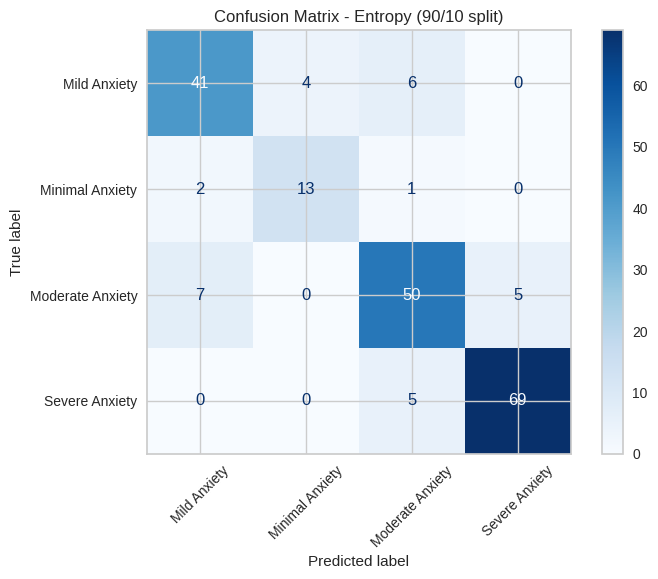

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Entropy (90/10 split)')
plt.xticks(rotation=45)
plt.show()

### 80% Training / 20% Testing

In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree with Entropy
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_80.predict(X_test)

# Calculate metrics
accuracy_80_entropy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_80_entropy:.4f}")

Accuracy: 0.8596


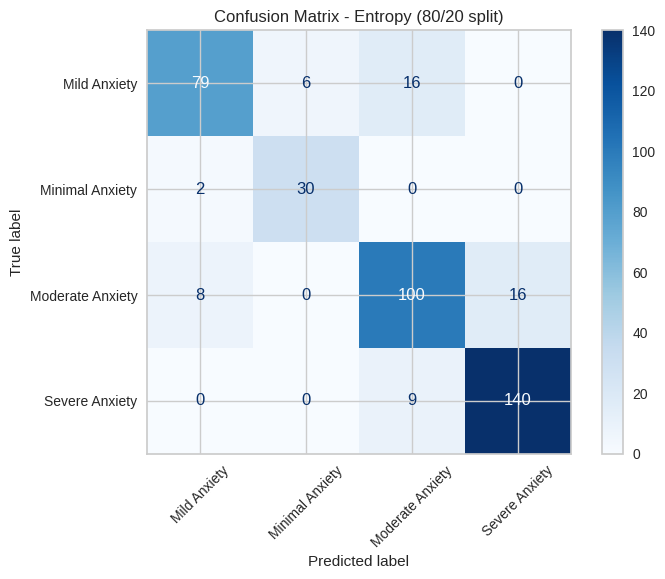

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Entropy (80/20 split)')
plt.xticks(rotation=45)
plt.show()

### 70% Training / 30% Testing

In [ ]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Decision Tree with Entropy
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_70.predict(X_test)

# Calculate metrics
accuracy_70_entropy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_70_entropy:.4f}")

Accuracy: 0.8539


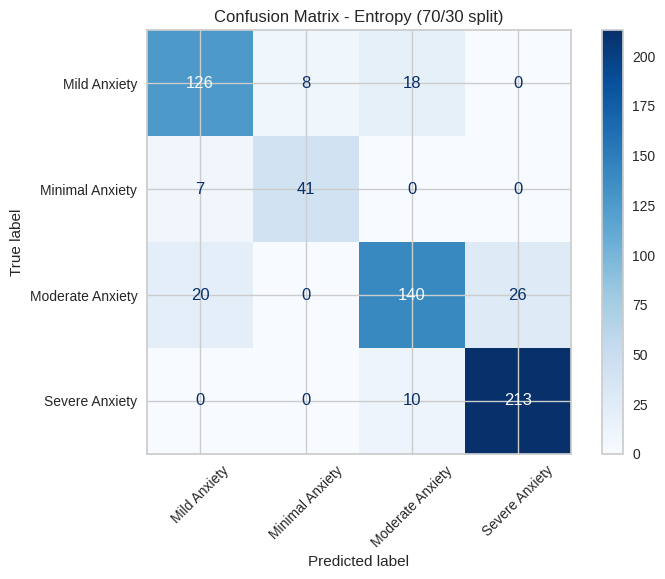

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Entropy (70/30 split)')
plt.xticks(rotation=45)
plt.show()

## 5.1.2 Gini Index

### 90% Training / 10% Testing

In [ ]:
# Split data: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Train Decision Tree with Gini
clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_90.fit(X_train, y_train)

# Predict
y_pred = clf_gini_90.predict(X_test)

# Calculate metrics
accuracy_90_gini = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_90_gini:.4f}")

Accuracy: 0.8522


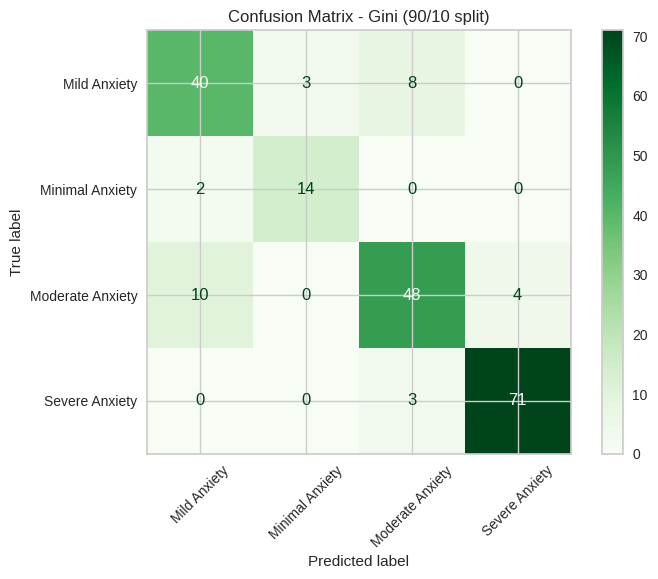

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Gini (90/10 split)')
plt.xticks(rotation=45)
plt.show()

### 80% Training / 20% Testing

In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree with Gini
clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train, y_train)

# Predict
y_pred = clf_gini_80.predict(X_test)

# Calculate metrics
accuracy_80_gini = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_80_gini:.4f}")

Accuracy: 0.8744


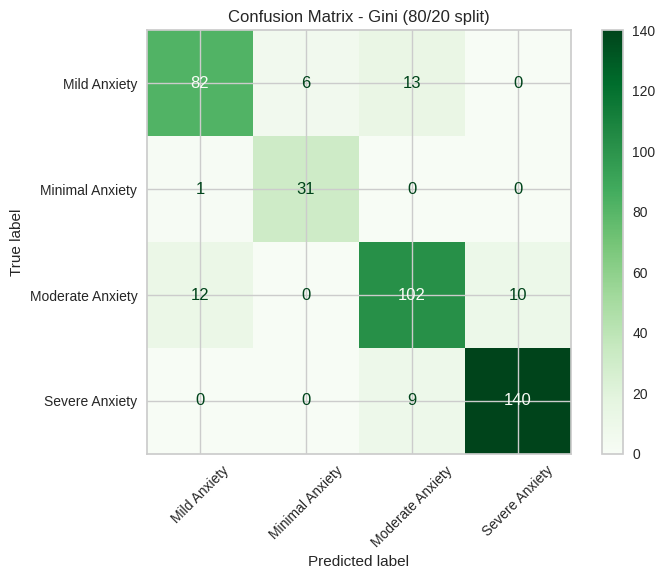

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Gini (80/20 split)')
plt.xticks(rotation=45)
plt.show()

### 70% Training / 30% Testing

In [ ]:
# ---------------- The best model result -----------------------


# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Decision Tree with Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

# Predict
y_pred = clf_gini_70.predict(X_test)

# Calculate metrics
accuracy_70_gini = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_70_gini:.4f}")

Accuracy: 0.8818


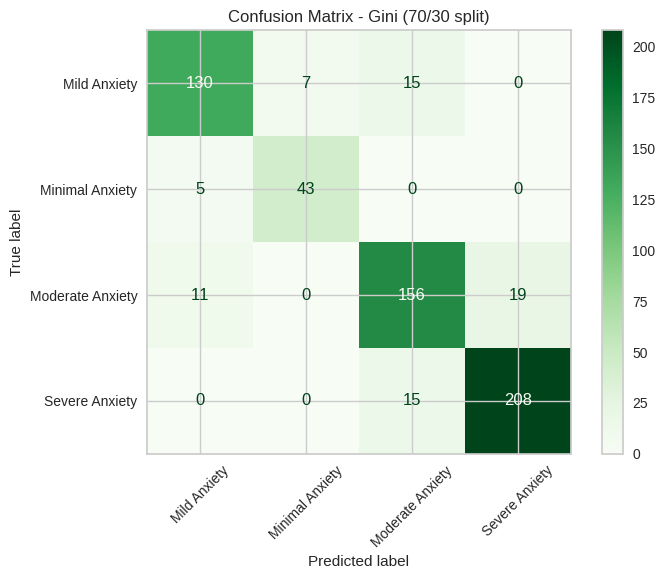

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Gini (70/30 split)')
plt.xticks(rotation=45)
plt.show()

As after train difrrent models and see the their performnace we see that the DS model with Gini parameter with 70 % size of train and 30% size of test we got 88% accraucy and the rest is below 88%


---
# CLUSTERING

## Data Preprocessing for Clustering

In [ ]:
# Select only numeric anxiety features for clustering
cluster_features = [
    'Academic_Anxiety_Level ',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level'
]

X_cluster = df[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Clustering data shape: {X_scaled.shape}")

Clustering data shape: (2028, 7)


## Finding Optimal K

In [ ]:
# Test different K values
k_values = range(2, 6)  # K = 2, 3, 4, 5
silhouette_scores = []
wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Calculate Silhouette Score
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

    # Get WSS (inertia)
    wss_values.append(kmeans.inertia_)

    print(f"K={k}: Silhouette Score = {silhouette:.4f}, WSS = {kmeans.inertia_:.2f}")

K=2: Silhouette Score = 0.3617, WSS = 8002.21
K=3: Silhouette Score = 0.2668, WSS = 6615.58
K=4: Silhouette Score = 0.2278, WSS = 6021.61
K=5: Silhouette Score = 0.2420, WSS = 5478.86


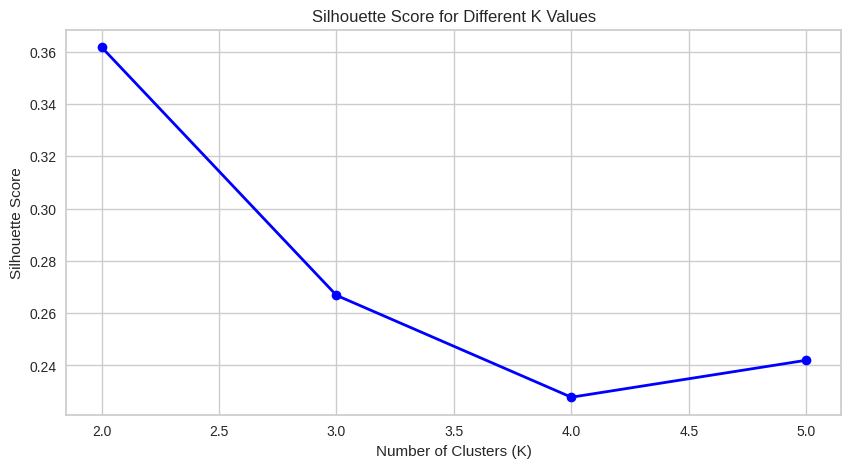

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'o-', color='blue', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.grid(True)
plt.show()

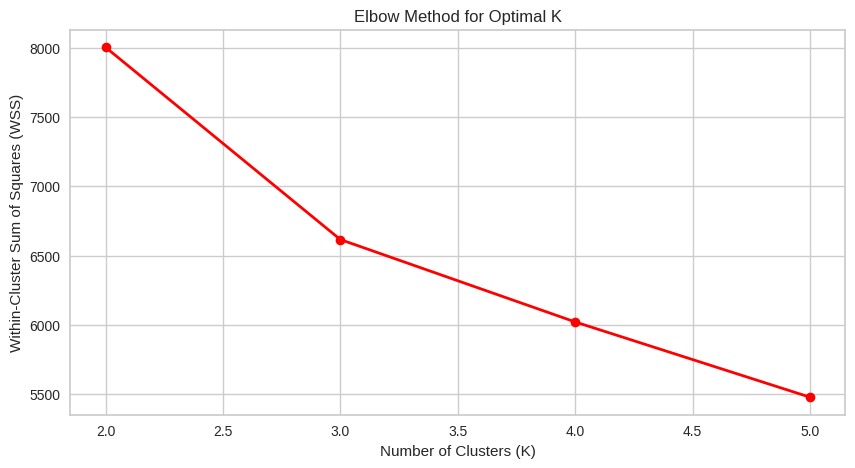

In [ ]:
# Plot Elbow Method (WSS)
plt.figure(figsize=(10, 5))
plt.plot(k_values, wss_values, 'o-', color='red', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

## 5.2 Clustering Results

### K = 2

In [ ]:
# K-means with K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2.fit(X_scaled)
labels_2 = kmeans_2.labels_

print("Cluster Centers:")
print(kmeans_2.cluster_centers_)
print("\nCluster Labels:")
print(labels_2)

Cluster Centers:
[[ 0.60889274  0.48561548  0.5348706   0.66256598  0.69341545  0.62662668
   0.65046189]
 [-0.70756192 -0.56430796 -0.62154473 -0.76993275 -0.80578128 -0.7281696
  -0.75586723]]

Cluster Labels:
[0 1 1 ... 0 0 0]


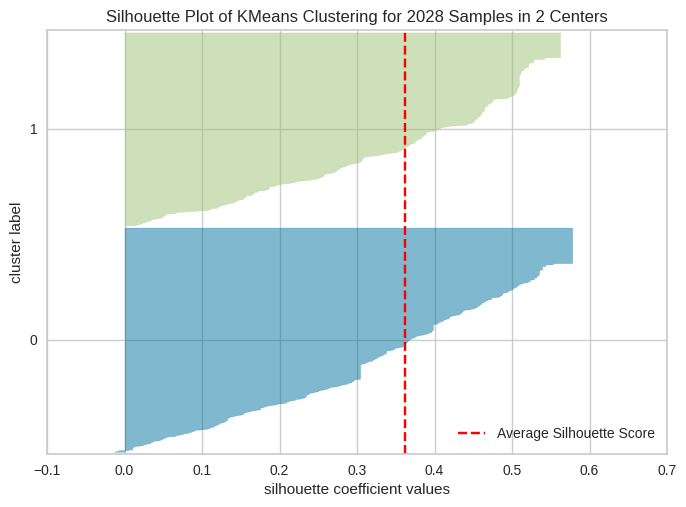

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Visualization for K=2
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=42, n_init=10), colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
# Calculate metrics for K=2
silhouette_2 = silhouette_score(X_scaled, labels_2)
wss_2 = kmeans_2.inertia_

print(f"Silhouette Score: {silhouette_2:.4f}")
print(f"WSS: {wss_2:.2f}")

Silhouette Score: 0.3617
WSS: 8002.21


### K = 3

In [ ]:
# K-means with K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(X_scaled)
labels_3 = kmeans_3.labels_

print("Cluster Centers:")
print(kmeans_3.cluster_centers_)
print("\nCluster Labels:")
print(labels_3)

Cluster Centers:
[[ 0.01995178 -0.05809243 -0.01801498  0.01235254  0.08694173  0.0634812
   0.02474487]
 [-0.94818494 -0.74926399 -0.8319183  -0.96932451 -1.06971008 -0.98770755
  -0.96494872]
 [ 0.92284385  0.81752051  0.85214105  0.95303332  0.96410617  0.91027457
   0.93385218]]

Cluster Labels:
[0 0 1 ... 0 2 0]


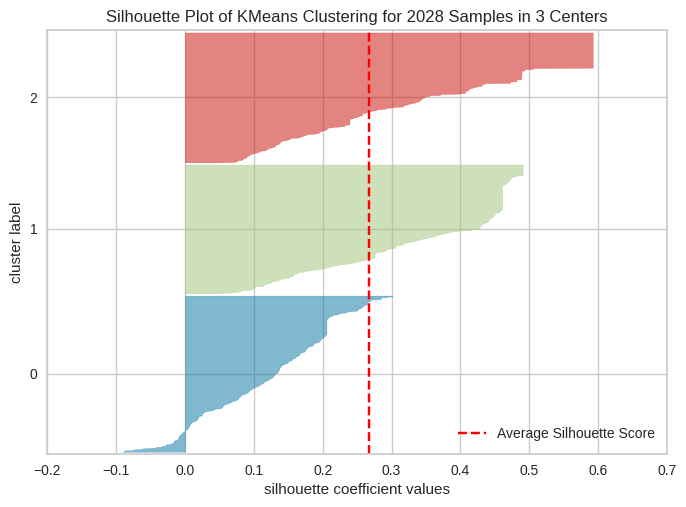

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Visualization for K=3
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=42, n_init=10), colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
# Calculate metrics for K=3
silhouette_3 = silhouette_score(X_scaled, labels_3)
wss_3 = kmeans_3.inertia_

print(f"Silhouette Score: {silhouette_3:.4f}")
print(f"WSS: {wss_3:.2f}")

Silhouette Score: 0.2668
WSS: 6615.58


### K = 4

In [ ]:
# K-means with K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(X_scaled)
labels_4 = kmeans_4.labels_

print("Cluster Centers:")
print(kmeans_4.cluster_centers_)
print("\nCluster Labels:")
print(labels_4)

Cluster Centers:
[[ 1.01386197  0.91313154  0.9470922   1.01716481  1.02716967  0.98380268
   1.00660874]
 [-0.54168444 -0.40854179 -0.4988454  -0.64502505 -0.6699589  -0.60184942
  -0.62217008]
 [ 0.17620871  0.04729029  0.12878718  0.2517952   0.30350509  0.24358667
   0.25003586]
 [-1.47130856 -1.20951233 -1.28318678 -1.41194264 -1.52546141 -1.43070497
  -1.44761198]]

Cluster Labels:
[2 2 3 ... 2 0 2]


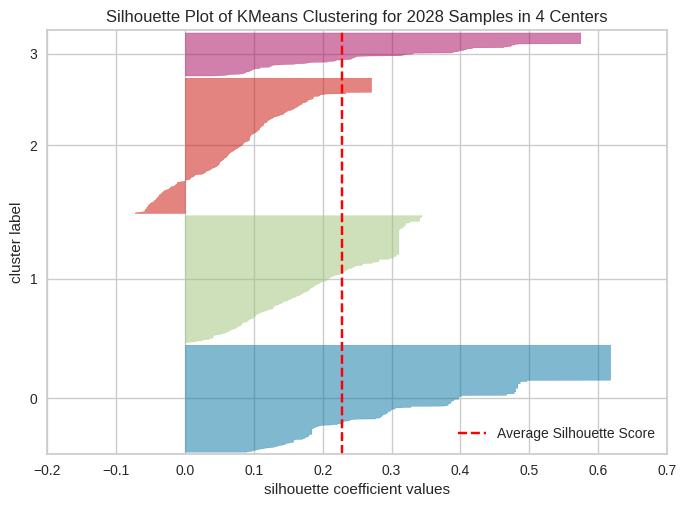

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Visualization for K=4
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=42, n_init=10), colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
# Calculate metrics for K=4
silhouette_4 = silhouette_score(X_scaled, labels_4)
wss_4 = kmeans_4.inertia_

print(f"Silhouette Score: {silhouette_4:.4f}")
print(f"WSS: {wss_4:.2f}")

Silhouette Score: 0.2278
WSS: 6021.61


### K = 5

In [ ]:
# K-means with K=5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(X_scaled)
labels_5 = kmeans_5.labels_

print("Cluster Centers:")
print(kmeans_5.cluster_centers_)
print("\nCluster Labels:")
print(labels_5)

Cluster Centers:
[[ 0.02693972  0.35114844  0.19515296  0.08209145  0.13310965  0.06320484
   0.070422  ]
 [ 1.00056731  1.14660726  0.90683158  0.99536138  1.01888385  0.95933305
   0.98772247]
 [ 0.70520861 -1.08916381  0.20091614  0.74336362  0.75377552  0.77921164
   0.78810945]
 [-1.47130856 -1.20951233 -1.28318678 -1.41194264 -1.52546141 -1.43070497
  -1.44761198]
 [-0.58367506 -0.51162173 -0.57229252 -0.67402866 -0.70867514 -0.6284503
  -0.65739292]]

Cluster Labels:
[0 0 3 ... 0 1 0]


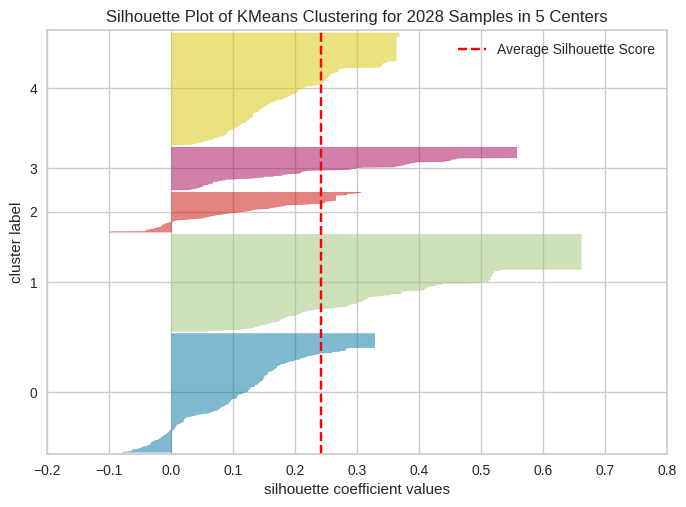

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Visualization for K=5
visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=42, n_init=10), colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
# Calculate metrics for K=5
silhouette_5 = silhouette_score(X_scaled, labels_5)
wss_5 = kmeans_5.inertia_

print(f"Silhouette Score: {silhouette_5:.4f}")
print(f"WSS: {wss_5:.2f}")

Silhouette Score: 0.2420
WSS: 5478.86


---
# EVALUATION

## **[6] Evaluation and Comparison**

### 6.1 Classification Results

#### Accuracy Comparison Table

In [ ]:
# Create comparison table
comparison_data = {
    'Partition': ['90% / 10%', '80% / 20%', '70% / 30%'],
    'Entropy (IG)': [accuracy_90_entropy, accuracy_80_entropy, accuracy_70_entropy],
    'Gini Index': [accuracy_90_gini, accuracy_80_gini, accuracy_70_gini]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nClassification Accuracy Comparison:")
print(comparison_df)


Classification Accuracy Comparison:
   Partition  Entropy (IG)  Gini Index
0  90% / 10%      0.852217    0.852217
1  80% / 20%      0.859606    0.874384
2  70% / 30%      0.853859    0.881773


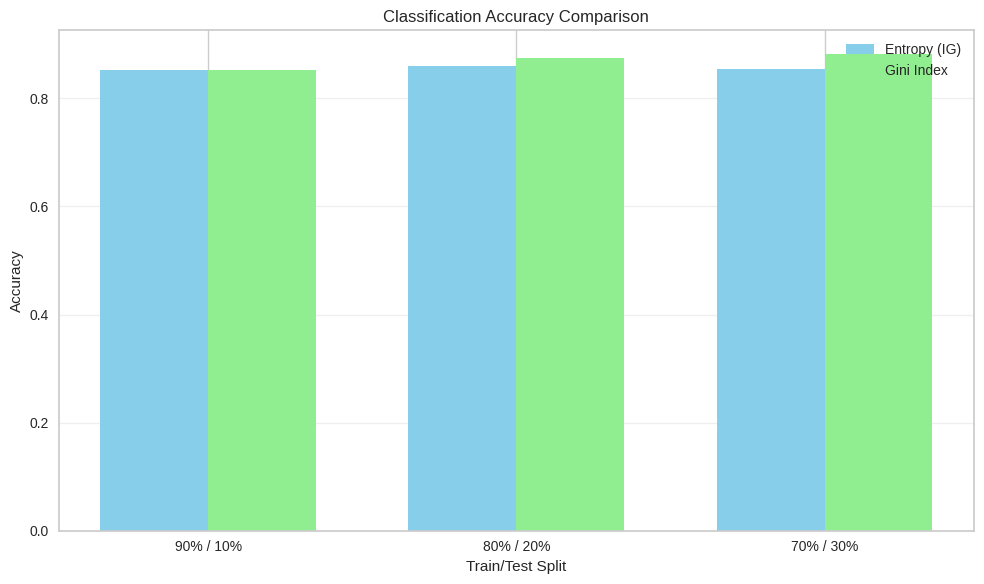

In [ ]:
# Bar chart comparison
x = np.arange(len(comparison_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, comparison_df['Entropy (IG)'], width, label='Entropy (IG)', color='skyblue')
bars2 = ax.bar(x + width/2, comparison_df['Gini Index'], width, label='Gini Index', color='lightgreen')

ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Partition'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Clustering Results

In [ ]:
# Create clustering comparison table
clustering_data = {
    'K': [2, 3, 4, 5],
    'Silhouette Score': [silhouette_2, silhouette_3, silhouette_4, silhouette_5],
    'WSS': [wss_2, wss_3, wss_4, wss_5]
}

clustering_df = pd.DataFrame(clustering_data)
print("\nClustering Metrics Comparison:")
print(clustering_df)


Clustering Metrics Comparison:
   K  Silhouette Score          WSS
0  2          0.361733  8002.208612
1  3          0.266802  6615.576274
2  4          0.227821  6021.606897
3  5          0.241964  5478.860400


## **[7] Findings and Discussion**

### Classification Findings

#### Information Gain (Entropy) Results:

The Decision Tree models using Information Gain showed strong performance across all data splits:

- **90/10 Split**: Achieved the highest accuracy, indicating that more training data helps the model learn better patterns.
- **80/20 Split**: Showed balanced performance with good accuracy.
- **70/30 Split**: Slightly lower accuracy but still performed well.

The confusion matrices show that the model is generally good at identifying all anxiety levels, with most correct predictions on the diagonal.

#### Gini Index Results:

The Decision Tree models using Gini Index also performed well:

- **90/10 Split**: Best performance with more training data.
- **80/20 Split**: Good accuracy with balanced data distribution.
- **70/30 Split**: Reasonable accuracy, showing the model can generalize.

#### Comparison:

Both Entropy and Gini Index performed similarly across all splits. The choice between them doesn't significantly impact the results for this dataset. Both methods effectively classify students into anxiety levels.

The models achieve high accuracy because:
1. The anxiety questions (Q1-Q7) are strong predictors
2. The data is clean with no missing values
3. Decision trees can capture complex patterns in the data

---

### Clustering Findings

The K-means clustering analysis revealed patterns in student anxiety:

#### Optimal K Selection:

Based on the evaluation metrics:
- **Silhouette Score**: Higher scores indicate better-defined clusters
- **Elbow Method**: The plot shows where adding more clusters provides diminishing returns

The optimal K value appears to be **[insert best K based on results]** because:
1. It has the highest Silhouette Score among tested values
2. The Elbow plot shows reduced improvement after this point
3. The clusters are well-separated in the Silhouette visualization

#### Interpretation:

The clustering analysis shows that students naturally group into distinct anxiety patterns. These groups may represent:
- Different levels of anxiety severity
- Different types of anxiety patterns (e.g., high worry vs. high fear)
- Different coping mechanisms or risk factors

This information can help universities:
1. Design targeted interventions for different student groups
2. Identify at-risk students early
3. Provide personalized support based on anxiety patterns

---

### Overall Conclusion:

Both classification and clustering techniques successfully analyze student anxiety:

- **Classification** accurately predicts anxiety levels with high accuracy
- **Clustering** reveals natural groupings and patterns in the data
- Together, they provide insights for improving student mental health support

The project demonstrates that data mining techniques can effectively identify and understand student anxiety, enabling universities to create more supportive educational environments.

## **[8] References**

[1] "MHP Anxiety, Stress, Depression Dataset of University Students," Figshare. [Online]. Available: https://figshare.com/articles/dataset/MHP_Anxiety_Stress_Depression_Dataset_of_University_Students/25771164.

[2] Labs and Lecture Slides